# color options:
****
### Automate color-option-pipeline Choice
[psnr in skimage](https://scikit-image.org/docs/dev/api/skimage.measure.html) <br>
[matplotlib create color maps](https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html) <br>

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

import time
import sys
import tempfile

import cv2

import skimage.io as im_io
from skimage.measure import compare_psnr

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

from PIL import TiffImagePlugin as tip
from PIL.TiffImagePlugin import Image
from PIL import ImageOps

sys.path.insert(0, '../src/')
sys.path.insert(0, 'scalygraphic/src/')

from im_scale_products import *
from impute_color import *

t0 = time.time()

In [3]:
results_dir = '../../results'
run_parameters = get_default_run_parameters(results_dir=None)
run_parameters['it_max'] = 16
run_parameters['zoom'] = 1/27
run_parameters['max_d'] = 12 / run_parameters['zoom']
run_parameters['center_point'] = -18
run_parameters['theta'] = -np.pi / 2

w = 720
run_parameters['n_cols'] = w
run_parameters['n_rows'] = np.int(w / (1.618))


if os.path.isdir(run_parameters['dir_path']) == False:
    os.makedirs(run_parameters['dir_path'])
    
fcn_name = 'bugga_bear'
eq = name_functionhandle_dict[number_function_name_dict[fcn_name]][1]
# generate parameters:
p = eq(1, None)

print(fcn_name,'\tUsing Equation parameters:\n',p,'\n')
for k, v in run_parameters.items():
    print('%30s: %s'%(k, v))

list_tuple = [(eq, (p))]

t0 = time.time()
ET_1, Z_1, Z0_1 = eq_iter.get_primitives(list_tuple, run_parameters)
tt = time.time() - t0
print(tt, 's\ndata matrices size = ', ET_1.shape)

bugga_bear 	Using Equation parameters:
 [-0.85161229, -1.79435816, -4.45041513] 

                      dir_path: /Users/mojo/git_clone/dlanier/scalygraphic/doc_code
                  center_point: -18
                          zoom: 0.037037037037037035
                         theta: -1.5707963267948966
                        it_max: 16
                    scale_dist: 12
                         max_d: 324.0
                        n_rows: 444
                        n_cols: 720
41.89592504501343 s
data matrices size =  (444, 720)


## Single Channel
### Gray
#### blending all outputs

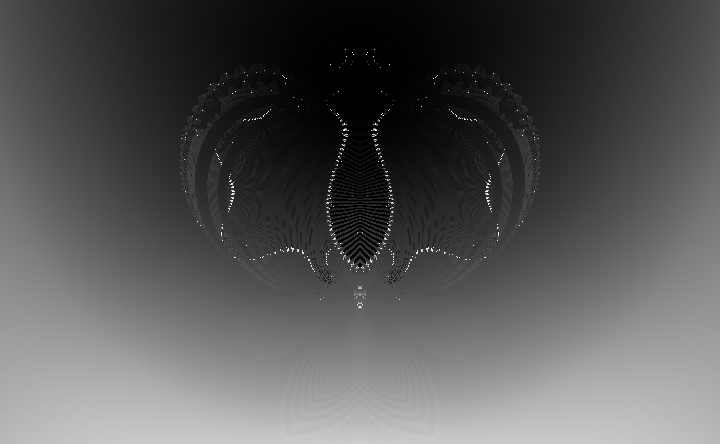

In [4]:
"""                                                          get_gray_im
                        8 bit PIL
"""
I_8_g = get_gray_im(Z0_1, Z_1, ET_1)
display(I_8_g)

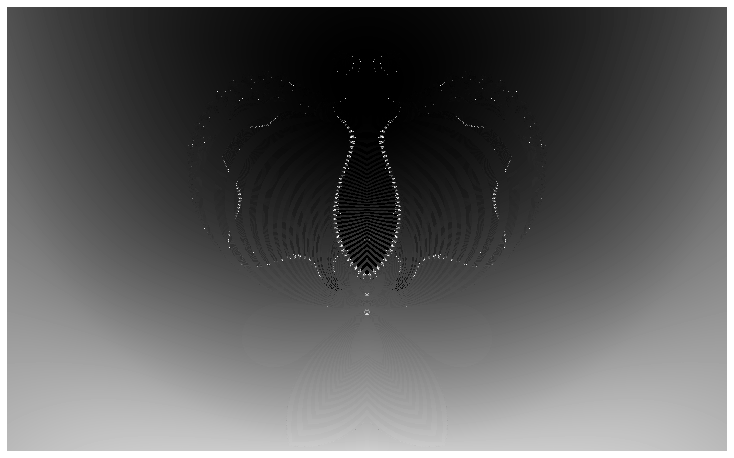

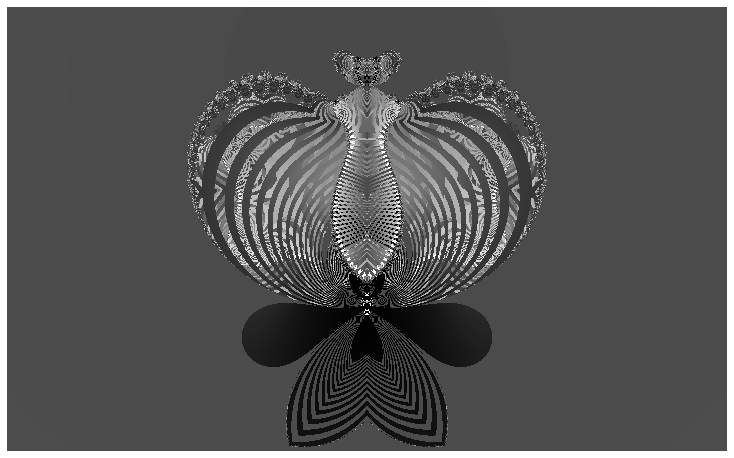

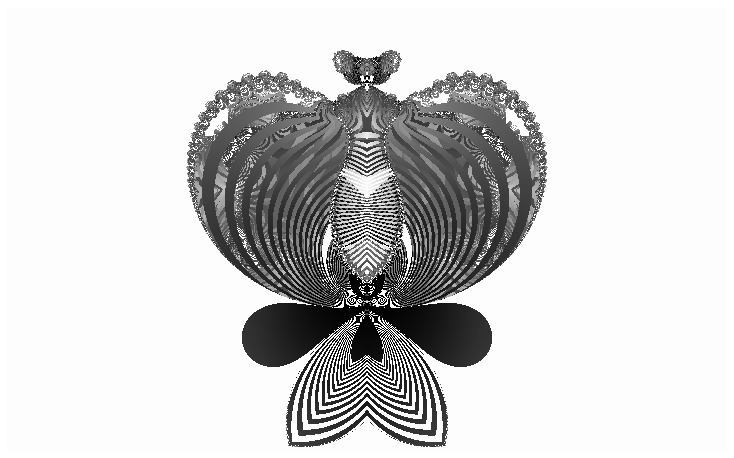

In [5]:
"""                                                          get_16bit_gray
                        16 bit 3-normalizations
"""
I_16_etg_norm = get_16bit_gray(Z0_1, Z_1, ET_1, norm='etg')
nb_imshow(I_16_etg_norm)
I_16_default_norm = get_16bit_gray(Z0_1, Z_1, ET_1, norm='')
nb_imshow(I_16_default_norm)
I_16_hsv_norm = get_16bit_gray(Z0_1, Z_1, ET_1, norm='hsv')
nb_imshow(I_16_hsv_norm)

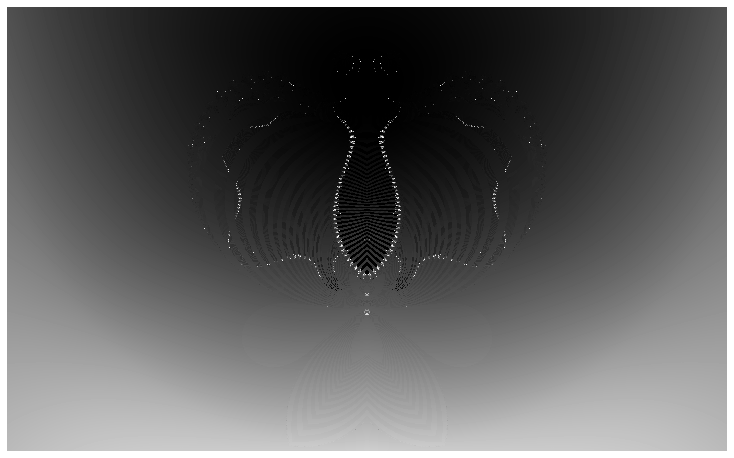

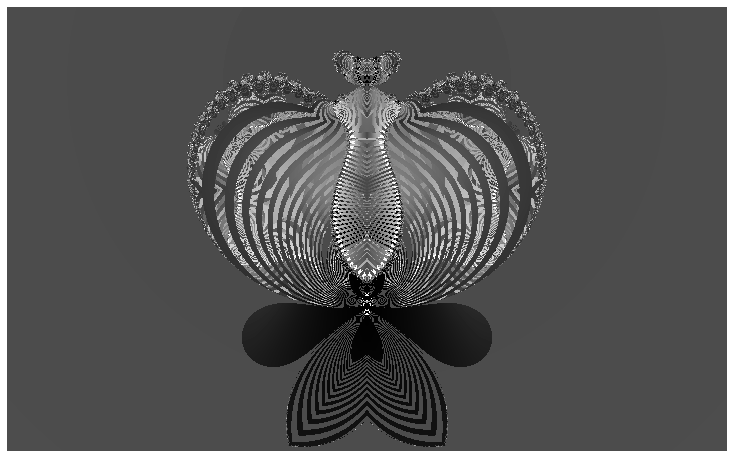

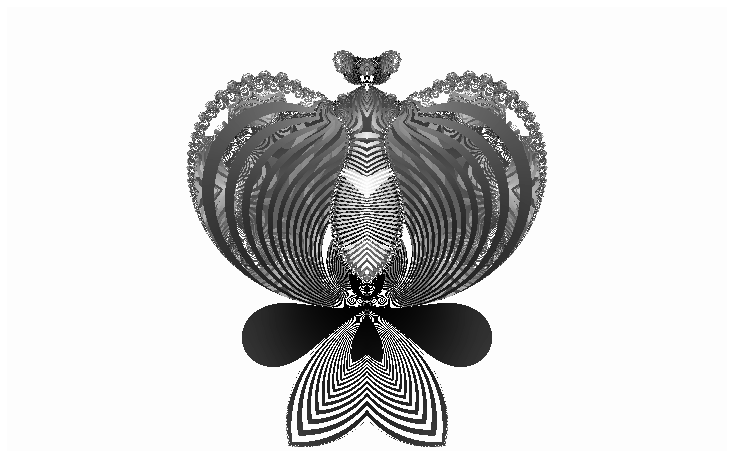

In [6]:
"""                                                          get_float32_gray
                        32 bit 3-normalzations                       
"""
I_32_etg_norm = get_float32_gray(Z0_1, Z_1, ET_1, norm='etg')
nb_imshow(I_32_etg_norm)
I_32_default_norm = get_float32_gray(Z0_1, Z_1, ET_1, norm='')
nb_imshow(I_32_default_norm)
I_32_hsv_norm = get_float32_gray(Z0_1, Z_1, ET_1, norm='hsv')
nb_imshow(I_32_hsv_norm)

## Signal to noise compare hi to lo bit depth:
[psnr in skimage](https://scikit-image.org/docs/dev/api/skimage.measure.html) <br>

In [19]:
s_8 = (np.array(I_8_g).astype(np.float32) / (2**8 - 1))
s_16 = (I_16_etg_norm.astype(np.float32) / (2**16 - 1))

print('s_8.min()', s_8.min(), 's_8.max()', s_8.max())
print('s_16.min()', s_16.min(), 's_16.max()', s_16.max())
print('I_32_etg_norm.min()', I_32_etg_norm.min(), 'I_32_etg_norm.max()', I_32_etg_norm.max())
print('\n')

psnr_16_8 = compare_psnr(s_16, s_8)
print('psnr_16_8\t%0.3f'%(psnr_16_8))

psnr_32_8 = compare_psnr(I_32_etg_norm, s_8)
print('psnr_32_8\t%0.3f'%(psnr_32_8))

psnr_32_16 = compare_psnr(I_32_etg_norm, s_16)
print('psnr_32_16\t%0.3f'%(psnr_32_16))

s_8.min() 0.0 s_8.max() 0.99607843
s_16.min() 0.0 s_16.max() 0.9994812
I_32_etg_norm.min() 0.0 I_32_etg_norm.max() 0.99948025


psnr_16_8	35.108
psnr_32_8	35.108
psnr_32_16	102.405


####  single channel as gray

In [8]:
Zd, Zr, ETn = etg_norm(Z0_1, Z_1, ET_1)

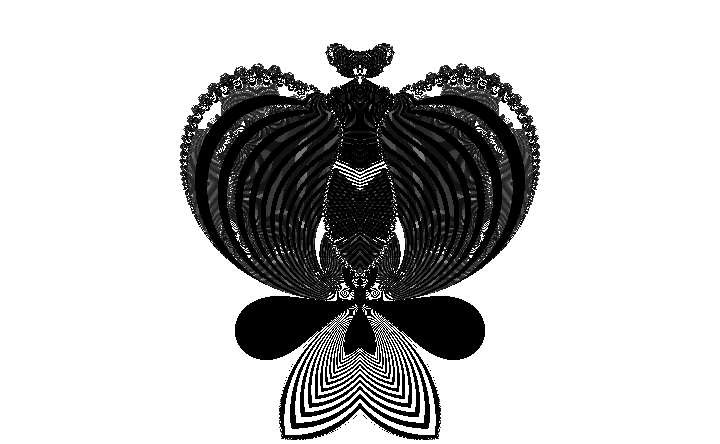

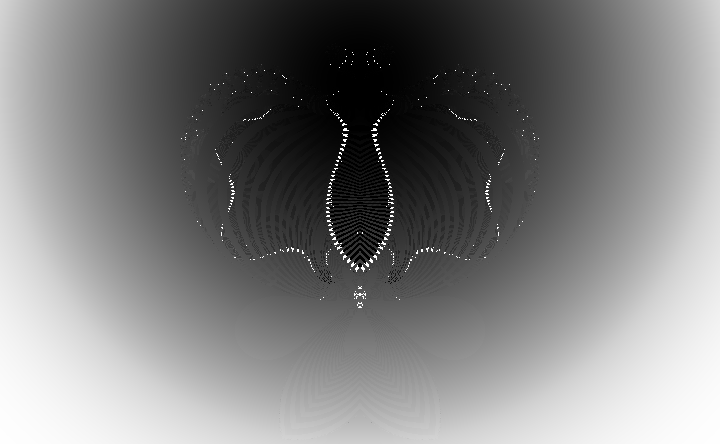

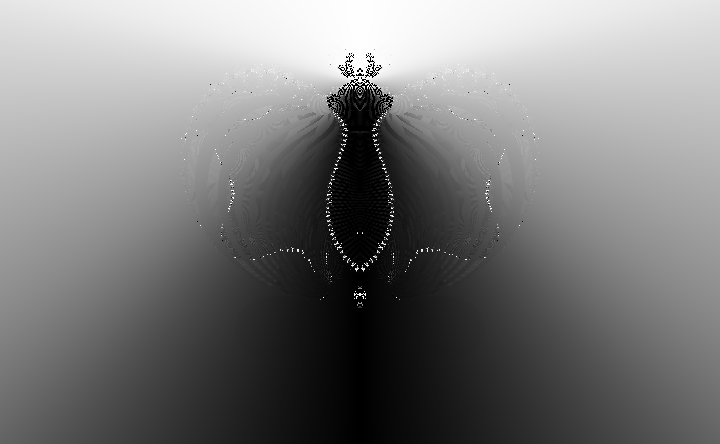

In [9]:
"""                                                          primitive_2_gray_8_bit
            Note:   primitive_2_gray(P)  calls this function internally
                    but that may change
"""
IP_ET_8_g = primitive_2_gray_8_bit(ETn)
nb_imshow(IP_ET_8_g)
IP_Zd_8_g = primitive_2_gray_8_bit(Zd)
nb_imshow(IP_Zd_8_g)
IP_Zr_8_g = primitive_2_gray_8_bit(Zr)
nb_imshow(IP_Zr_8_g)

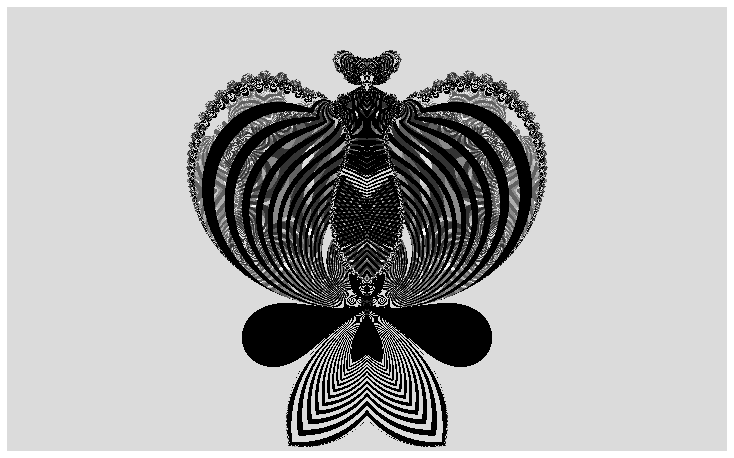

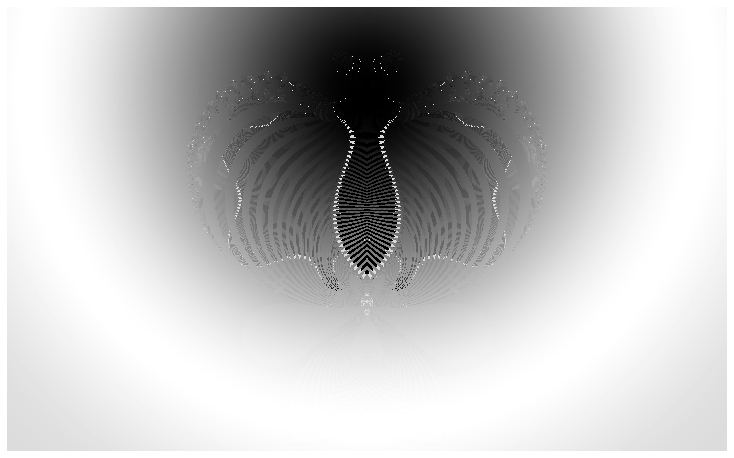

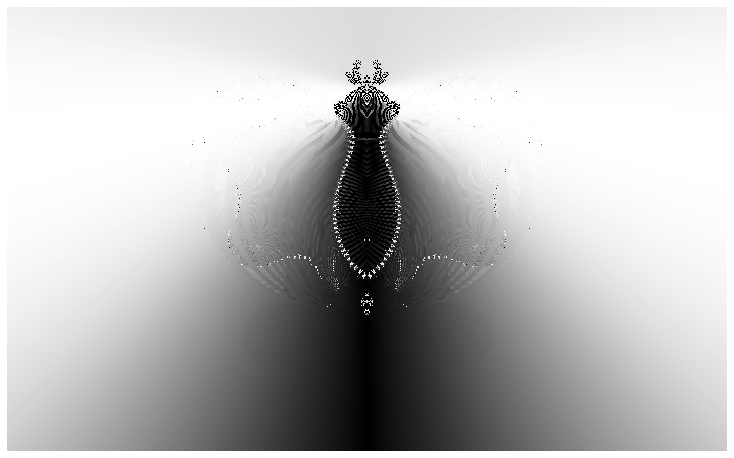

In [10]:
"""                                                          primitive_2_gray_16bit
                        
"""
IP_ET_16_g = primitive_2_gray_16bit(ETn)
nb_imshow(IP_ET_16_g)
IP_Zd_16_g = primitive_2_gray_16bit(Zd)
nb_imshow(IP_Zd_16_g)
IP_Zr_16_g = primitive_2_gray_16bit(Zr)
nb_imshow(IP_Zr_16_g)

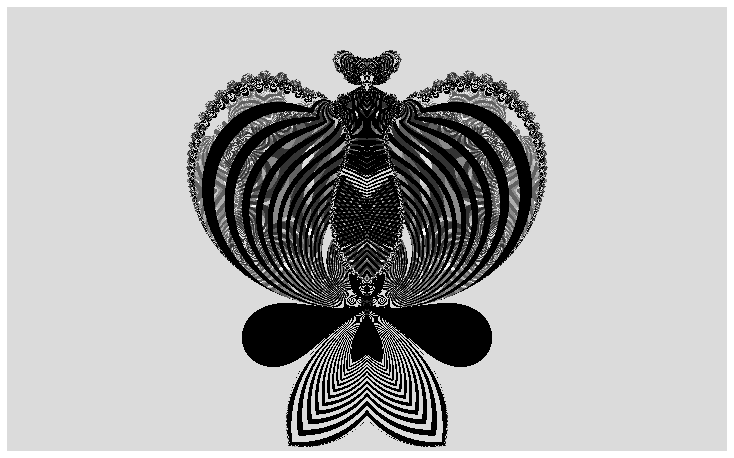

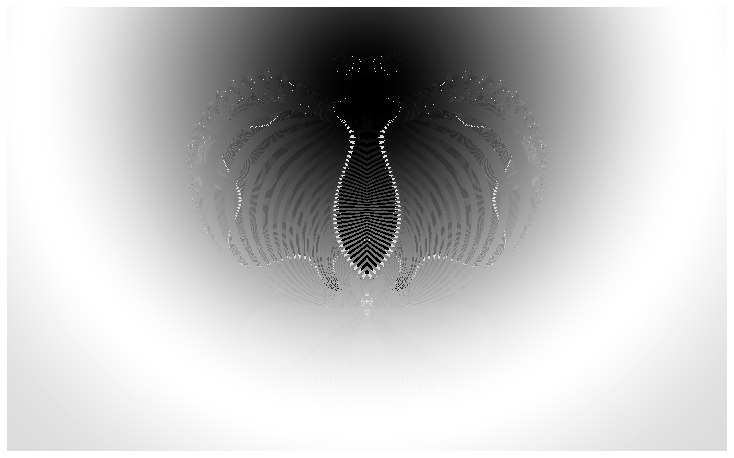

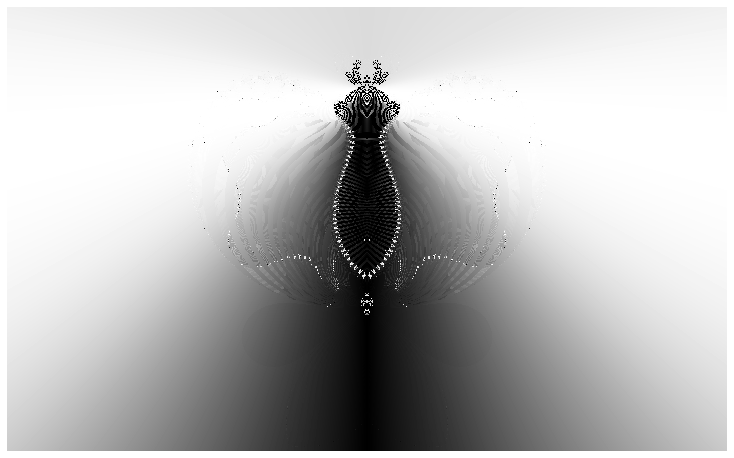

In [11]:
"""                                                          primitive_2_gray_float32
                        
"""
IP_ET_32_g = primitive_2_gray_float32(ETn)
nb_imshow(IP_ET_32_g)
IP_Zd_32_g = primitive_2_gray_float32(Zd)
nb_imshow(IP_Zd_32_g)
IP_Zr_32_g = primitive_2_gray_float32(Zr)
nb_imshow(IP_Zr_32_g)

## Signal to noise for single channel compare hi to lo bit depth:
[psnr in skimage](https://scikit-image.org/docs/dev/api/skimage.measure.html) <br>

In [21]:
sc_8 = (np.array(IP_ET_8_g).astype(np.float32) / (2**8 - 1))
sc_16 = (IP_ET_16_g.astype(np.float32) / (2**16 - 1))

print('sc_8.min()', sc_8.min(), 'sc_8.max()', sc_8.max())
print('sc_16.min()', sc_16.min(), 'sc_16.max()', sc_16.max())
print('IP_ET_32_g.min()', IP_ET_32_g.min(), 'IP_ET_32_g.max()', IP_ET_32_g.max())
print('\n')


psnr_sc_16_8 = compare_psnr(sc_16, sc_8,0.359)
print('psnr_16_8\t%0.3f'%(psnr_sc_16_8))

psnr_sc_32_8 = compare_psnr(IP_ET_32_g, sc_8,0.359)
print('psnr_32_8\t%0.3f'%(psnr_sc_32_8))

psnr_sc_32_16 = compare_psnr(IP_ET_32_g, sc_16,0.359)
print('psnr_32_16\t%0.3f'%(psnr_sc_32_16))

sc_8.min() 0.0 sc_8.max() 1.0
sc_16.min() 0.0 sc_16.max() 0.3595636
IP_ET_32_g.min() 0.0 IP_ET_32_g.max() 0.3595717


psnr_16_8	-4.361
psnr_32_8	-4.361
psnr_32_16	100.817


## RGB
### composited color:

get_im(Z0_1, Z_1, ET_1)


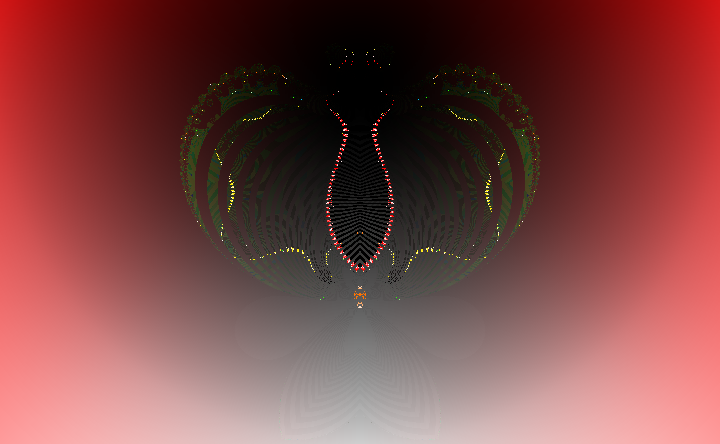


Out of Order input accident:
get_im(ET_1, Z_1, Z0_1)


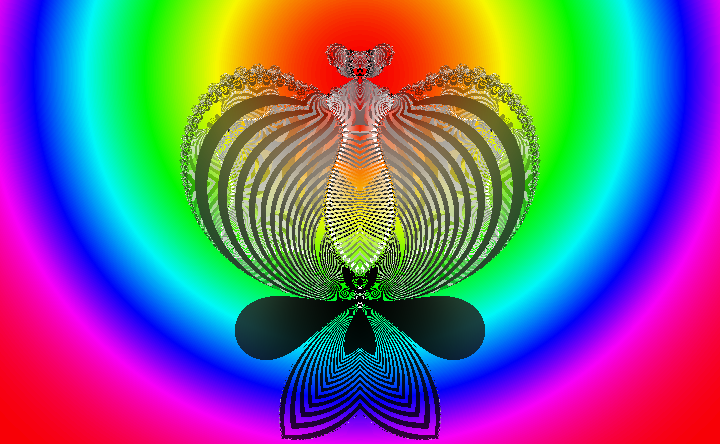

In [13]:
"""                                                          get_im(Z0, Z, ET)
            Legacy PIL 8 bit image
"""
rgb_legacy = get_im(Z0_1, Z_1, ET_1)
print('get_im(Z0_1, Z_1, ET_1)')
nb_imshow(rgb_legacy)

rgb_accidental = get_im(ET_1, Z_1, Z0_1)
print('\nOut of Order input accident:\nget_im(ET_1, Z_1, Z0_1)')
nb_imshow(rgb_accidental)


get_rgb_float32(Z0_1, Z_1, ET_1, norm='etg')


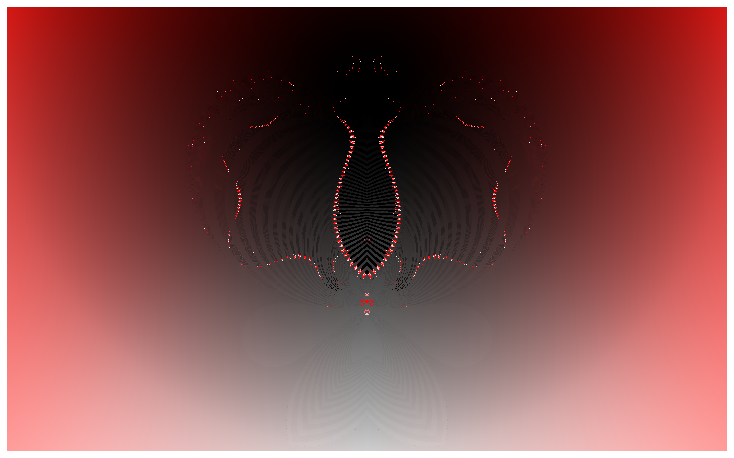

get_rgb_float32(Z0_1, Z_1, ET_1, norm='hsv')


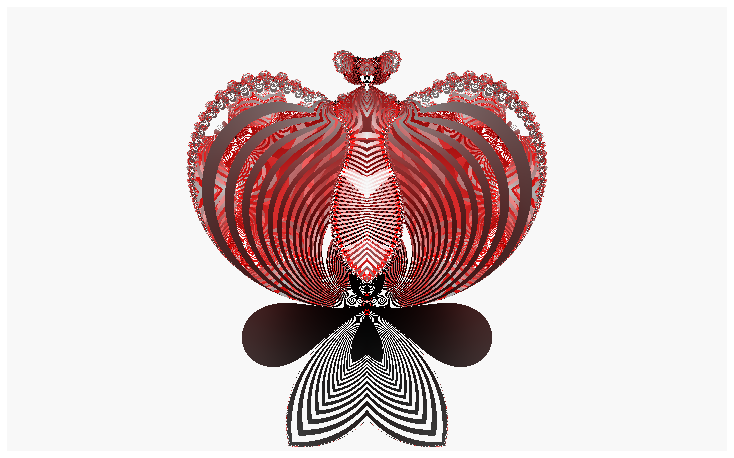

get_rgb_float32(Z0_1, Z_1, ET_1, norm='')


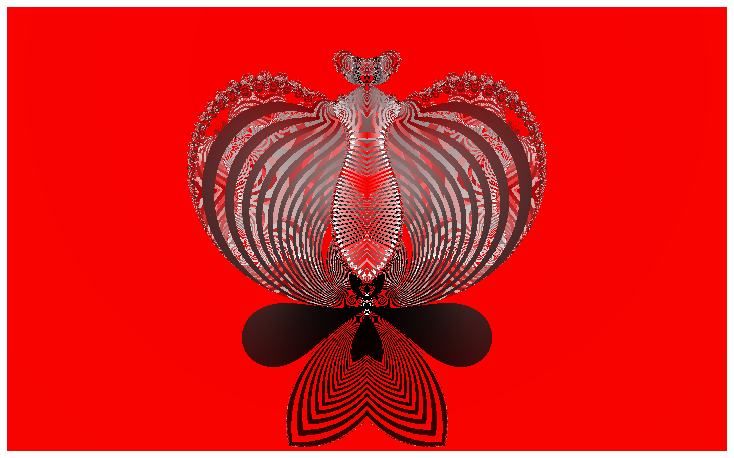

In [14]:
"""                                                          get_rgb_float32(Z0, Z, ET, norm='')
"""
rgb_etg_norm = get_rgb_float32(Z0_1, Z_1, ET_1, norm='etg')
print("get_rgb_float32(Z0_1, Z_1, ET_1, norm='etg')")
nb_imshow(rgb_etg_norm)
rgb_hsv_norm = get_rgb_float32(Z0_1, Z_1, ET_1, norm='hsv')
print("get_rgb_float32(Z0_1, Z_1, ET_1, norm='hsv')")
nb_imshow(rgb_hsv_norm)
rgb_default_norm = get_rgb_float32(Z0_1, Z_1, ET_1, norm='')
print("get_rgb_float32(Z0_1, Z_1, ET_1, norm='')")
nb_imshow(rgb_default_norm)

## Color Mapping:

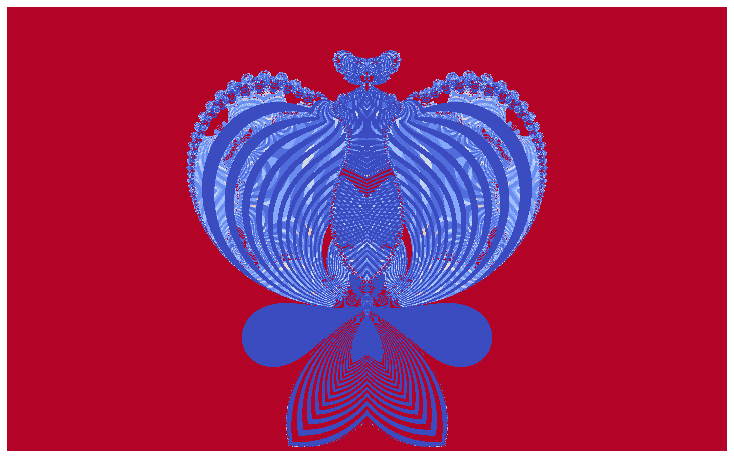

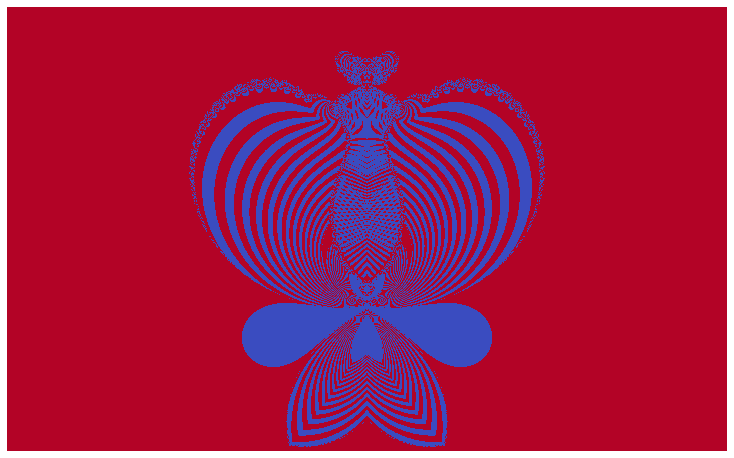

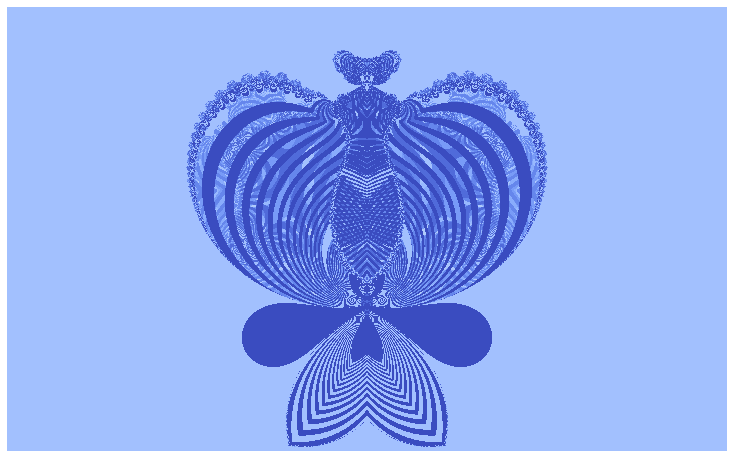

type(I_mp_32_bg) <class 'numpy.ndarray'>


In [15]:
# def mat_stock_map(I, c_map_name):
#     c_map = mpl.cm.get_cmap(c_map_name)
#     return c_map(I)

c_map_name = 'coolwarm'

I_mp_8_bg = mat_stock_map(np.array(IP_ET_8_g), c_map_name)
nb_imshow(I_mp_8_bg)

I_mp_16_bg = mat_stock_map(IP_ET_16_g, c_map_name)
nb_imshow(I_mp_16_bg)
# IP_ET_32_g
I_mp_32_bg = mat_stock_map(IP_ET_32_g, c_map_name)
nb_imshow(I_mp_32_bg)
print('type(I_mp_32_bg)', type(I_mp_32_bg))

In [16]:
show_color_maps(6)

            Accent             Blues              BrBG              BuGn              BuPu            CMRmap
              GnBu            Greens             Greys              OrRd           Oranges              PRGn
           Pastel1           Pastel2              PiYG              PuBu            PuBuGn              PuOr
           Purples              RdBu              RdGy              RdPu            RdYlBu            RdYlGn
              Set1              Set2              Set3          Spectral            Wistia              YlGn
            YlOrBr            YlOrRd            afmhot            autumn            binary              bone
               bwr           cividis              cool          coolwarm            copper         cubehelix
        gist_earth         gist_gray         gist_heat         gist_ncar      gist_rainbow        gist_stern
           gnuplot          gnuplot2              gray               hot               hsv           inferno
             magma 

In [17]:
nb_run_all_time = time.time() - t0
print('%0.3f seconds to run all cells'%(nb_run_all_time))

57.911 seconds to run all cells
